## LetsGrowMore Virtual Internship Program (August-2022)

#### Intermediate Level Task 1

#### Name : Rajat Garg 

#### Task 1:Exploratory Data Analysis on Data- set- Terrorism


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
terror_data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
terror_data.head(10)

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'attackType','targtype1_txt':'targetType','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)

In [7]:
terror_data = terror_data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"attackType",'Kill',
               'Wound','target1','Summary','Group','targetType','Weapon','motive']]


In [8]:
terror_data.shape

(181691, 18)

In [9]:
terror_data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
attackType         0
Kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
targetType         0
Weapon             0
motive        131130
dtype: int64

In [10]:
terror_data['Wound'] = terror_data['Wound'].fillna(0)
terror_data['Kill'] = terror_data['Kill'].fillna(0)

### Visualize the data

#### Citites attacked  frequently

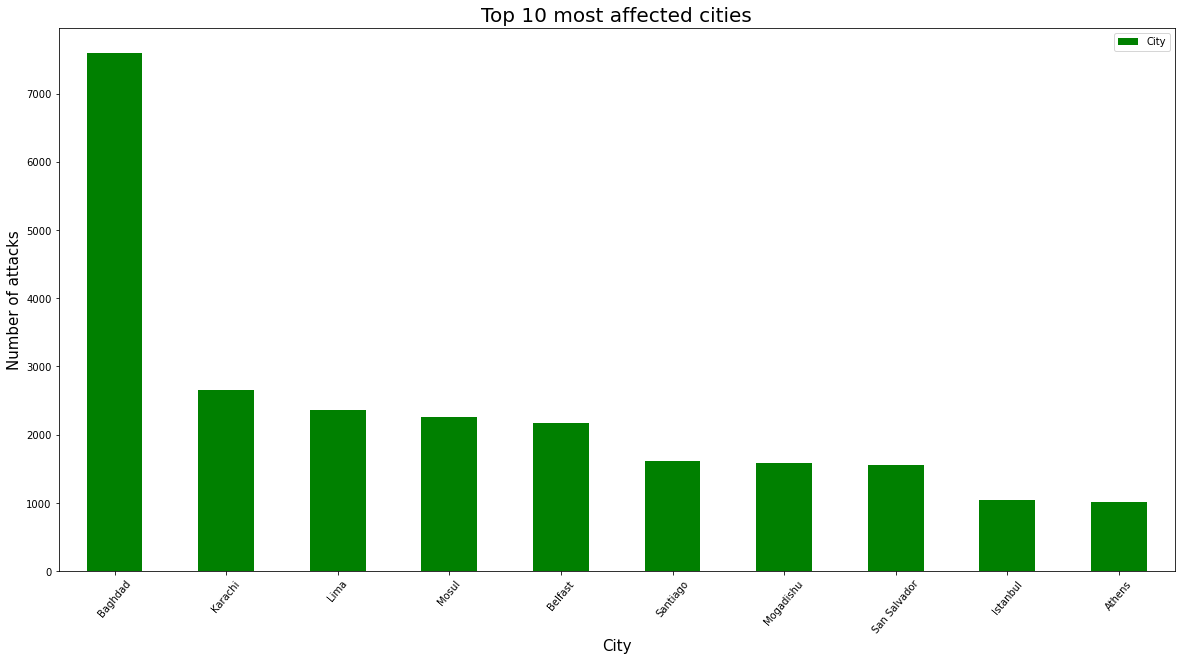

In [16]:
terror_data['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected cities",fontsize=20)
plt.show()

### Countries attacked frequently

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


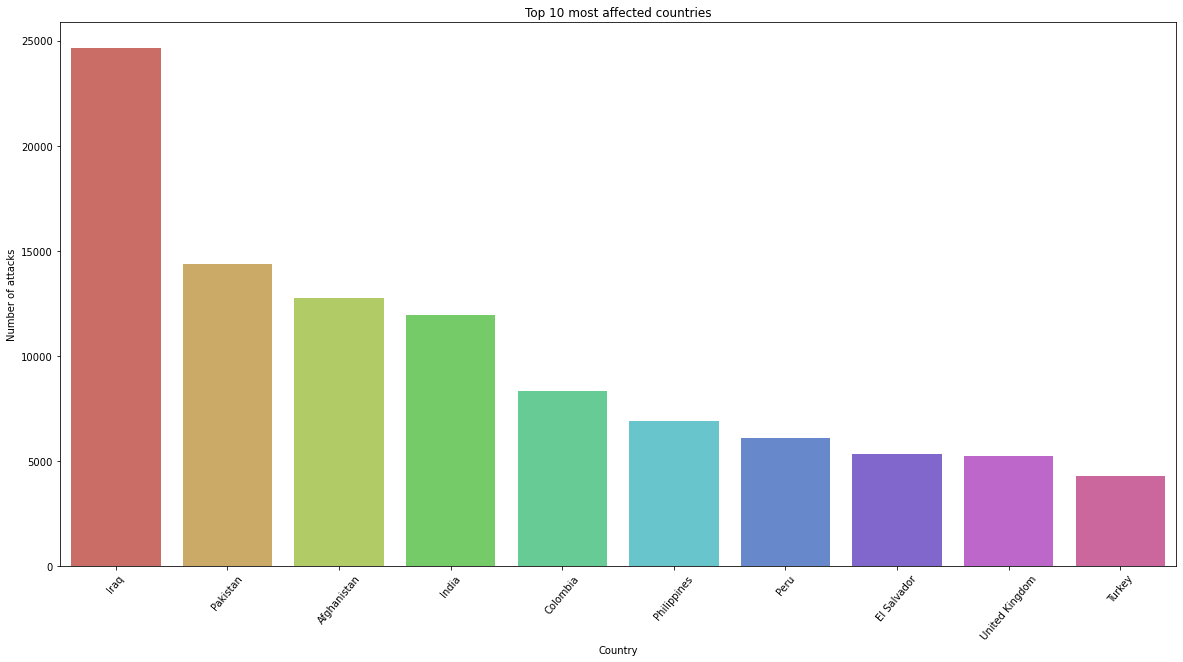

In [17]:
plt.subplots(figsize=(20,10))
sns.barplot(terror_data['Country'].value_counts()[:10].index,terror_data['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries')
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 50)
plt.show()

### Region attacked frequently

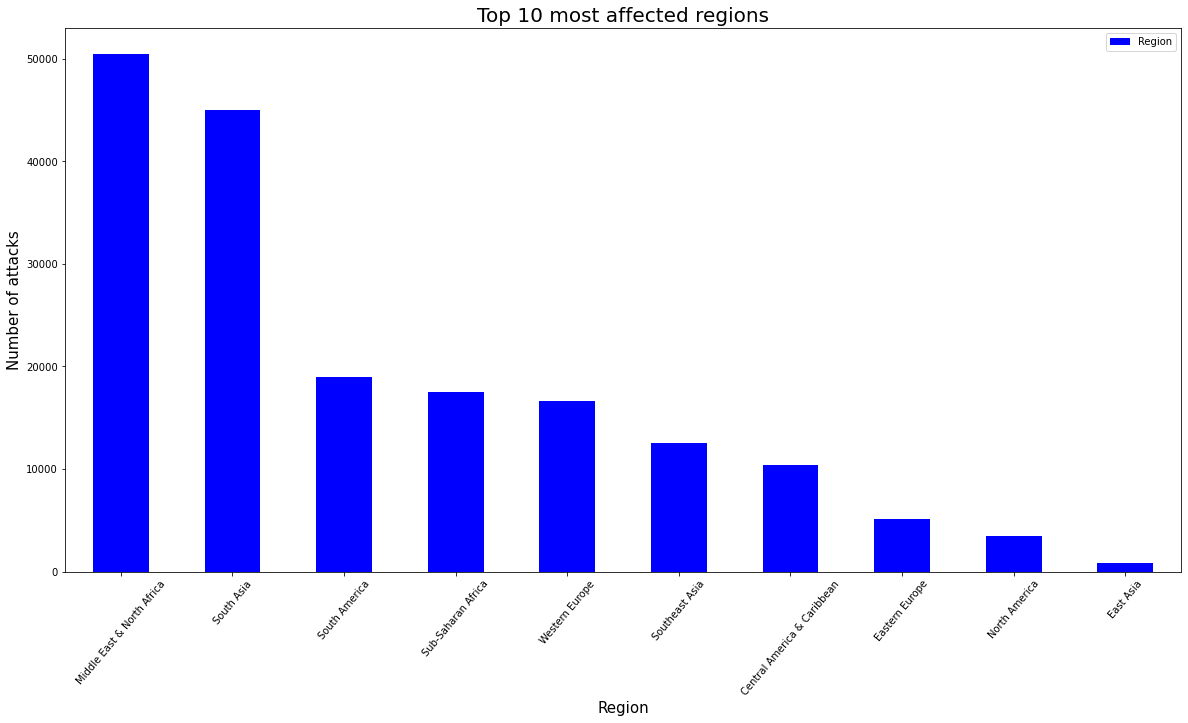

In [18]:
terror_data['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected regions",fontsize=20)
plt.show()

### Most attacked groups 

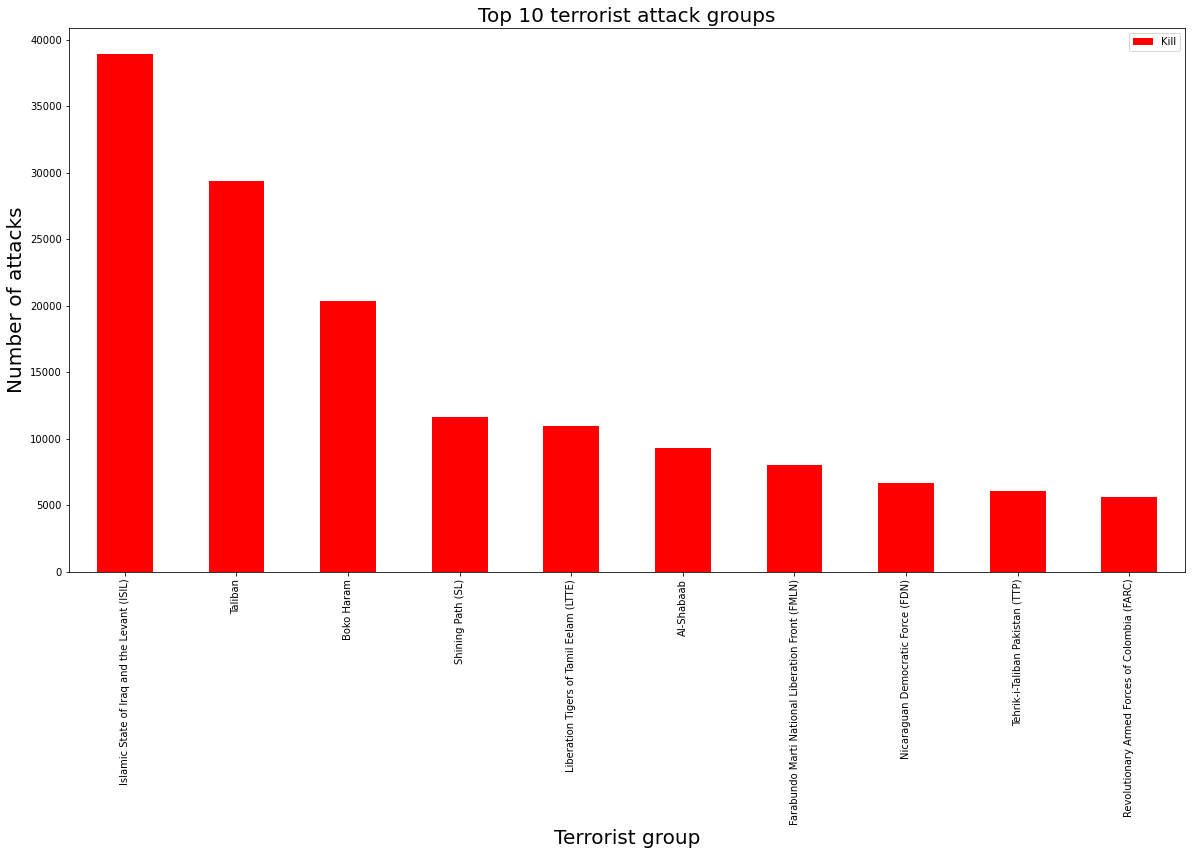

In [19]:
terror_data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist attack groups",fontsize=20)
plt.xlabel("Terrorist group",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

### Types of target attacked most 

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


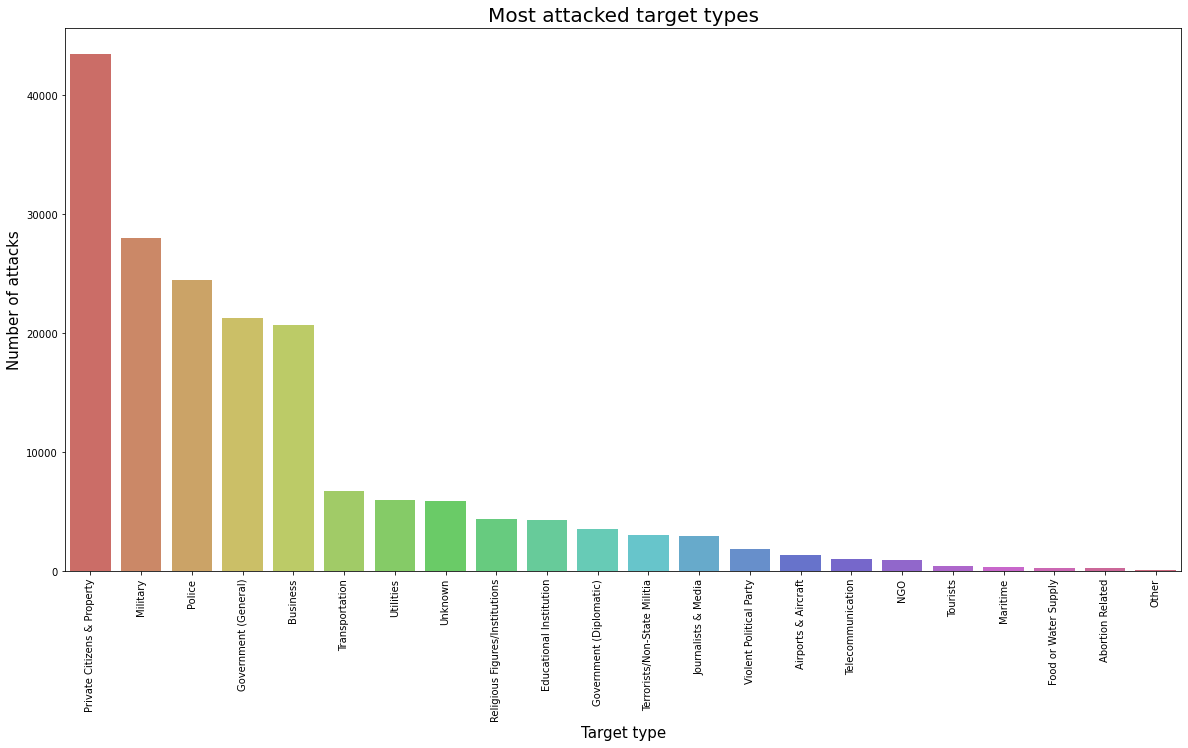

In [20]:
plt.subplots(figsize=(20,10))
sns.countplot(terror_data["targetType"],order=terror_data['targetType'].value_counts().index,palette="hls");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

###  Types of attack



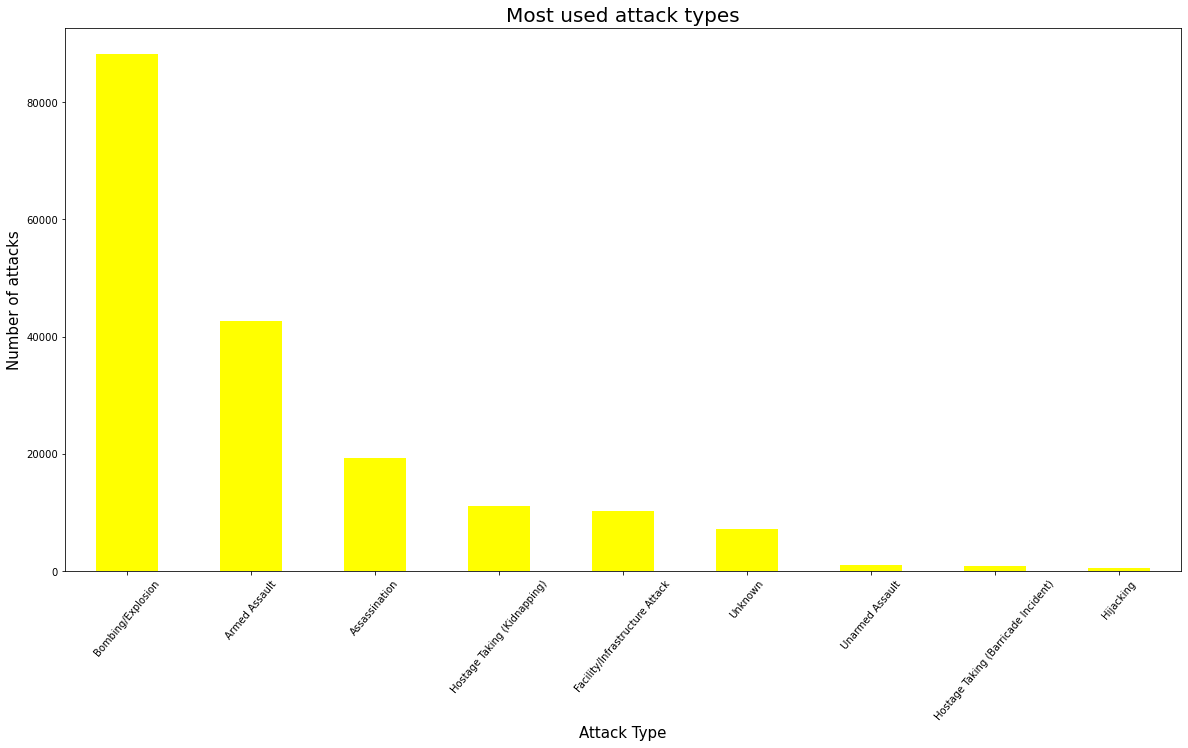

In [21]:
terror_data['attackType'].value_counts().plot(kind='bar',figsize=(20,10),color='yellow')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most used attack types",fontsize=20)
plt.show()